# Finding roots of functions
Finding the roots of functions is an excercise which has many applications. However, closed forms are not always available. Indeed we are lucky that quadratic equations have the closed form of $-b \pm \sqrt{b^2 - 4ac}\over{2a}$  
Here we discuss some methods for numerically approximating roots of functions. 

## Bisection method
The bisection method repeatedly bisects an interval and then selects a subinterval in which a root must lie for further processing.

A good way to visualize the method is this wikipedia picture.  
![image](https://upload.wikimedia.org/wikipedia/commons/8/8c/Bisection_method.svg)

In [1]:
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def candidate_function(x):
    return (3 * x) - 5

def bisection(function, a, b, tolerance=0.0001):
    """Finds root of function contained within [a, b] given that f(a) and f(b) have
    opposite signs"""
    fa, fb = function(a), function(b)
    c = (a + b) / 2
    fc = function(c)
    if abs(a - b) < tolerance:
        return c
    left, right = c, b  # the default
    if (fc * fa) < 0:  # opposite signs
        left, right = a, c
    return bisection(function, left, right, tolerance)

We try to find the root of the candidate function using the interval [10, -10]

In [3]:
a, b = 0, 5
root = bisection(candidate_function, a, b)
print(root)

1.6666793823242188


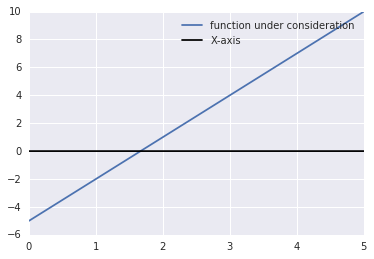

In [4]:
x = np.arange(a, b, 0.0001)
y = candidate_function(x)
x_axis = np.arange(a, b, 0.0001)
plt.plot(x, y, label='function under consideration')
plt.plot(x_axis, [0 for _ in x_axis], color='black', label='X-axis')
plt.legend()

To better visualize this, we rewrite the bisection function to report values to us whenever it is called.

In [5]:
reports = []
def bisection_reporter(function, a, b, tolerance=0.0001):
    fa, fb = function(a), function(b)
    c = (a + b) / 2
    fc = function(c)
    reports.append((a, b, c))
    if abs(a - b) < tolerance:
        return c
    left, right = c, b  # the default
    if (fc * fa) < 0:  # opposite signs
        left, right = a, c
    return bisection_reporter(function, left, right, tolerance)

In [6]:
root = bisection_reporter(candidate_function, a, b)
print(root)

1.6666793823242188


We see that the root remains the same. Now to see how the function went about it's calculation.

In [7]:
print('{} steps were taken to reach our answer'.format(len(reports)))

17 steps were taken to reach our answer


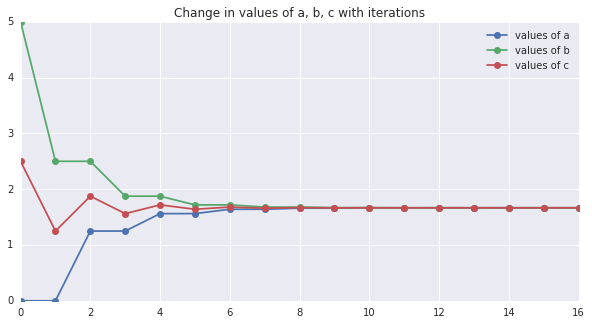

In [8]:
rep = np.array(reports)
a, b, c = rep[:,0], rep[:,1], rep[:,2]

plt.figure(figsize=(10, 5))
plt.plot(range(len(a)), a, '-o', label='values of a')
plt.plot(range(len(b)), b, '-o', label='values of b')
plt.plot(range(len(c)), c, '-o', label='values of c')

plt.title('Change in values of a, b, c with iterations')
plt.legend()

We can see the convergence of the values. Another thing to note is that the interval we are searching in reduces by half every step. Let's see how the number of steps change with change in tolerance.

In [9]:
a, b = 0, 5
tols = np.arange(0.000001, 0.1, 0.00001 )
steps = []
for tol in tols:
    reports = []
    bisection_reporter(candidate_function, a, b, tol)
    steps.append(len(reports))

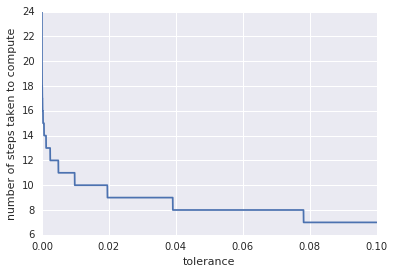

In [10]:
plt.plot(tols, steps)
plt.xlabel('tolerance')
plt.ylabel('number of steps taken to compute')

This tells us that the method increases in complexity as we require more precision. It's robust but slow.

## False Position Method
We first draw a straight line between [a, b] and find out where it intersects the x axis. Then we substitute **b** with this new intersection value. We consider the function $x^2 - 4x -10$ in the interval [2, 10]

In [11]:
def candidate_function(x):
    return (x *x) - 4 * x - 10

def false_position(function, a, b, tolerance=0.0001):
    c = (a * function(b) - b * function(a)) / (function(b) - function(a))
    if abs(function(c)) < tolerance:
        return c
    return false_position(function, c, b, tolerance)

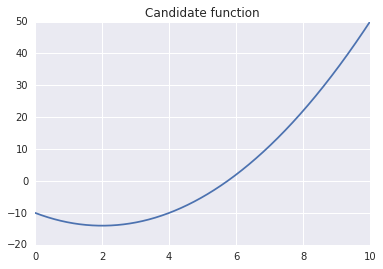

In [20]:
x = np.arange(0, 10, 0.001)
y = candidate_function(x)
plt.plot(x, y, label='Candidate function')
plt.title('Candidate function')

In [13]:
a, b = 2, 10
root = false_position(candidate_function, a, b)
print(root)

5.74165229052691


We see that as expected the root is near 6. Let's see how the function actually calculates the value. We redefine the function like earlier to report it's progress.

In [16]:
report = []
def false_position_report(function, a, b, tolerance=0.001):
    c = (a * function(b) - b * function(a)) / (function(b) - function(a))
    report.append((a, b, c, function(c)))
    if abs(function(c)) < tolerance:
        return c
    return false_position_report(function, c, b, tolerance)
false_position_report(candidate_function, a, b)

5.741550552407974

In [17]:
print('{} steps taken to calculate results'.format(len(report)))

11 steps taken to calculate results


Let's see how the values changed with each step.

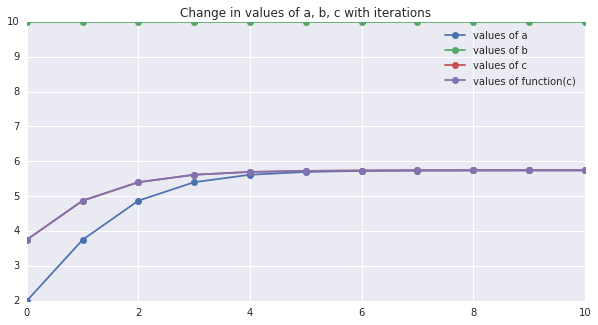

In [19]:
rep = np.array(report)
a, b, c, fc = rep[:,0], rep[:,1], rep[:,2], rep[:,3]

plt.figure(figsize=(10, 5))
plt.plot(range(len(a)), a, '-o', label='values of a')
plt.plot(range(len(b)), b, '-o', label='values of b')
plt.plot(range(len(c)), c, '-o', label='values of c')
plt.plot(range(len(fc)), c, '-o', label='values of function(c)')

plt.title('Change in values of a, b, c with iterations')
plt.legend()

A more clear picture would be obtained by plotting the difference in the estimate and the true value. In fact an even clearer picture would be showing how the function estimated everything.

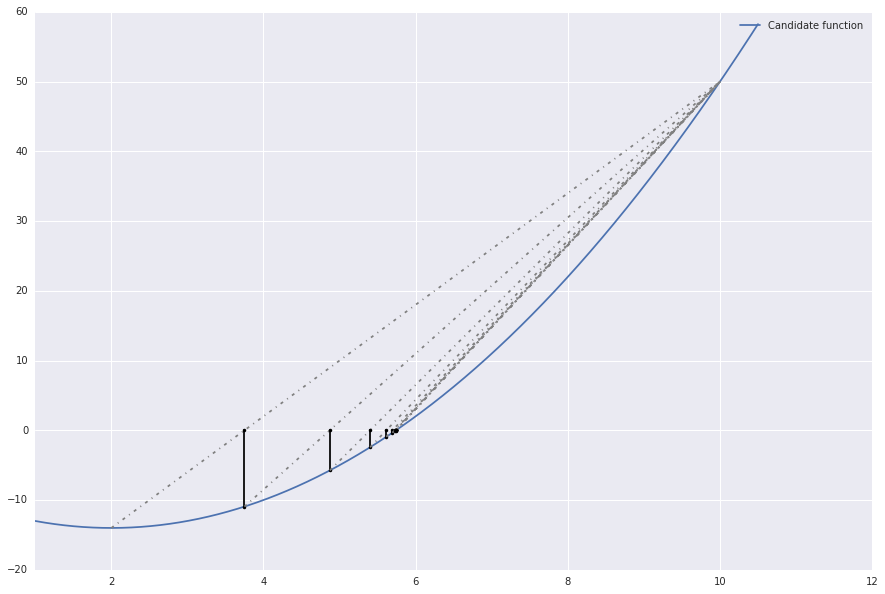

In [41]:
x = np.arange(1, 10.5, 0.001)
y = candidate_function(x)

plt.figure(figsize=(15, 10))
plt.plot(x, y, label='Candidate function')
plt.xlim(1)
for index, step in enumerate(report):
    a, b, c, fc  = step
    plt.plot([a, b], [candidate_function(a), candidate_function(b)], '-.', color='grey')
    plt.plot([c, c], [fc, 0], '.-', color='black')
plt.legend()

## Newton's method
This method requires that we can calculate the differential of our function. 
We get the tangent at a point on the curve, get tangent's x intersect and repeat for tangent at the intersect.

In [46]:
def candidate_function(x):
    return np.cos(x) - (x**3)

def differential(x):
    return ((-1 * np.sin(x)) - (3 * (x ** 2)))

def newton(function, differential, estimate, tolerance=0.001):
    y = function(estimate)
    yprime = differential(estimate)
    x1 = estimate - y / yprime
    if (abs(x1 - estimate) <=  tolerance * abs(x1)):
        return estimate
    return newton(function, differential, x1, tolerance)
print(newton(candidate_function, differential, 10))

0.865602682568


As expected, the method finds the right answer.

In [51]:
report = []
def newton_report(function, differential, estimate, tolerance=0.001):
    y = function(estimate)
    yprime = differential(estimate)
    x1 = estimate - y / yprime
    report.append((estimate, y, yprime, x1))
    if (abs(x1 - estimate) <=  tolerance * abs(x1)):
        return estimate
    return newton_report(function, differential, x1, tolerance)
newton_report(candidate_function, differential, 10)
print(len(report), 'steps used to compute')

9 steps used to compute


Again, the function is efficient. Let us see how the estimate changed with time.

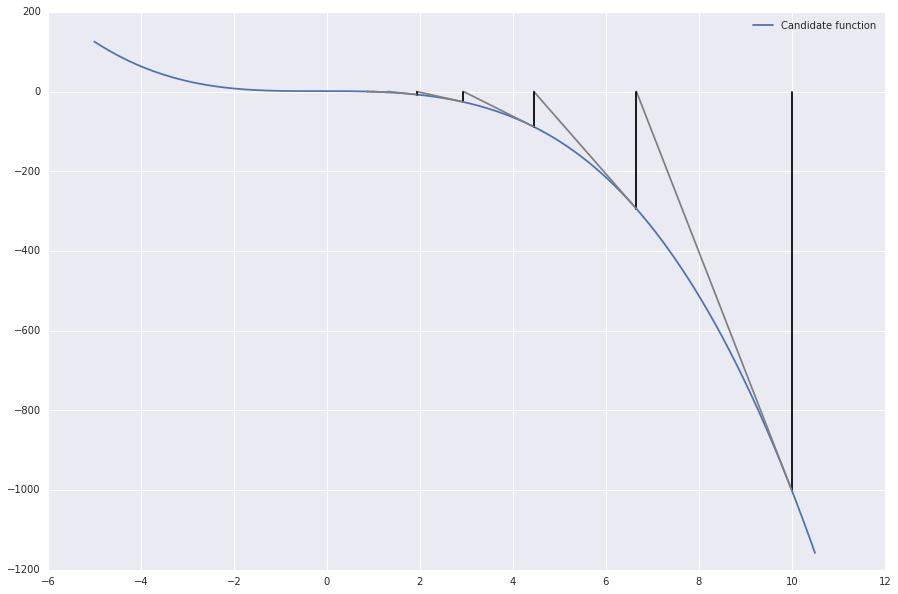

In [58]:
x = np.arange(-5, 10.5, 0.001)
y = candidate_function(x)

plt.figure(figsize=(15, 10))
plt.plot(x, y, label='Candidate function')

for index, step in enumerate(report):
    estimate, y, yprime, x1 = step
    plt.plot([estimate, estimate], [y, 0], color='black')
    plt.plot([estimate, x1], [y, 0], color='grey')
plt.legend()